In [66]:
import pandas as pd
df = pd.read_csv("hr.csv")
print(df)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [67]:
left = df[df['left']== 1]
left.shape

(3571, 10)

In [68]:
retain = df[df['left'] == 0]
retain.shape

(11428, 10)

In [69]:
newdf = df.drop(columns=['Department','salary'])
newdf.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

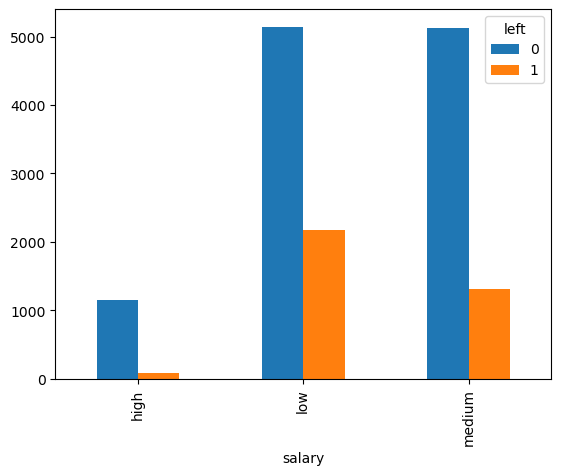

In [70]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

<Axes: xlabel='Department'>

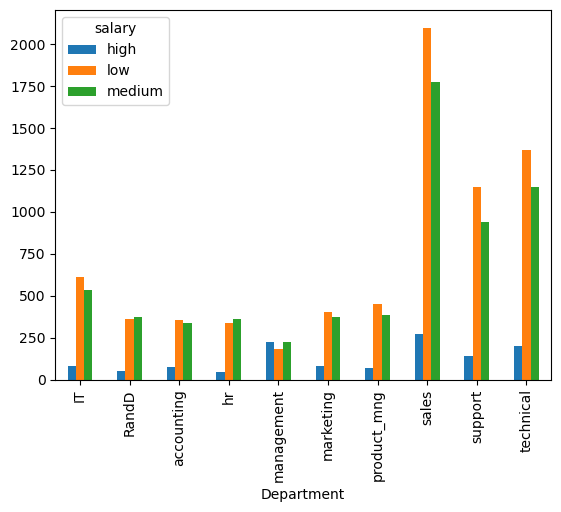

In [23]:
pd.crosstab(df['Department'],df['salary']).plot(kind='bar')

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
newdfx1 = df.drop(columns = (['left','Work_accident','number_project','last_evaluation','Department']))
y =df['left']

In [73]:
newdfx1

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium
3,0.72,223,5,0,low
4,0.37,159,3,0,low
...,...,...,...,...,...
14994,0.40,151,3,0,low
14995,0.37,160,3,0,low
14996,0.37,143,3,0,low
14997,0.11,280,4,0,low


In [74]:
x  = pd.get_dummies(newdfx1,dtype=int)
y  =df['left']
print(x.to_string())
print(y.to_string())

       satisfaction_level  average_montly_hours  time_spend_company  promotion_last_5years  salary_high  salary_low  salary_medium
0                    0.38                   157                   3                      0            0           1              0
1                    0.80                   262                   6                      0            0           0              1
2                    0.11                   272                   4                      0            0           0              1
3                    0.72                   223                   5                      0            0           1              0
4                    0.37                   159                   3                      0            0           1              0
5                    0.41                   153                   3                      0            0           1              0
6                    0.10                   247                   4                

In [75]:
model = LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [76]:
satisfaction_level = float(input())
montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium = map(int,input().split())
if (salary_high):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))
elif (salary_low):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))
elif (salary_medium):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))

0.38
157 3 0 0 1 0
[0]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
model.score(x,y)

0.7680512034135609

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)
print(x_train.shape)
print(y_train.shape)

(10049, 7)
(10049,)


In [79]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
model1.score(x_train,y_train)

0.7663449099412877

In [81]:
satisfaction_level = float(input())
montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium = map(int,input().split())
if (salary_high):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))
elif (salary_low):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))
elif (salary_medium):
    print(model.predict([[satisfaction_level,montly_hours,time_spend,promotion,salary_high,salary_low,salary_medium]]))

0.38
157 3 0 0 1 0
[0]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
